# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

# Reading Image

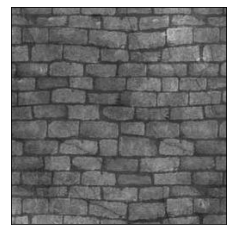

In [2]:
img = iio.imread('wall.jpg')

def show_image(img, title='', save=False, name=''):
    '''
    a function for showing images
    '''
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title(title)
    if save:
        plt.savefig(name)
    plt.show()
    
show_image(img)

# Fourier Transform of Image

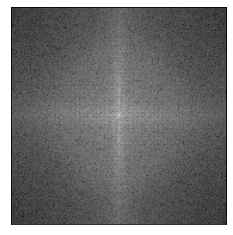

In [3]:
f = np.fft.fftshift(np.fft.fftn(img, axes=(0,1)))

def scale(a):
    '''
    a function for scaling images into [0...255]
    '''
    return np.uint8((a-np.min(a))/(np.max(a)-np.min(a)) * 255)

show_image(scale(20*np.log10(np.abs(f))))

# Ideal Lowpass Filter

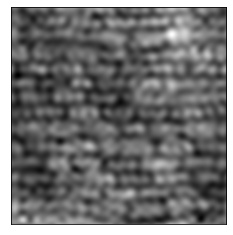

In [4]:
def ideal_filter(img, r):
    '''
    a function for creating ideal filter with lentgh (r)
    '''
    x, y = img.shape[0], img.shape[1]
    filt = np.zeros(img.shape)
    for k in range(img.shape[2]):
        filt[x//2-r//2:x//2+r//2, y//2-r//2:y//2+r//2, k] = 1
    return filt

new_img = scale(np.fft.ifftn(np.fft.ifftshift(ideal_filter(img, 40)*f), axes=(0,1)).real)
show_image(new_img)

# Ideal Highpass Filter

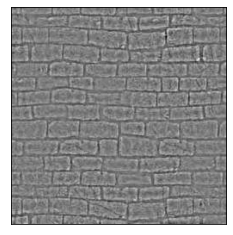

In [5]:
new_img = scale(np.fft.ifftn(np.fft.ifftshift((1-ideal_filter(img, 40))*f), axes=(0,1)).real)
show_image(new_img)

# Gaussian Filter

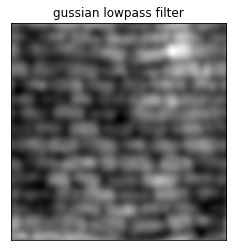

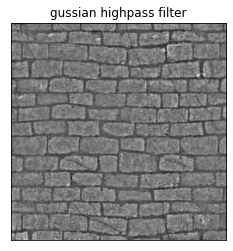

In [6]:
def gaussian_filter(img, sigma):
    x, y = img.shape[0], img.shape[1]
    i = np.linspace(0, x, x) - x//2
    j = np.linspace(0, y, y) - y//2
    g1 = np.exp(-i**2/(2*sigma**2))
    g2 = np.exp(-j**2/(2*sigma**2))
    filt = np.zeros(img.shape)
    for k in range(img.shape[2]):
        filt[:,:,k] = np.outer(g1, g2).copy()
    return filt

new_img = scale(np.fft.ifftn(np.fft.ifftshift(gaussian_filter(img, 10)*f), axes=(0,1)).real)
show_image(new_img, title='gussian lowpass filter')
new_img = scale(np.fft.ifftn(np.fft.ifftshift((1-gaussian_filter(img, 10))*f), axes=(0,1)).real)
show_image(new_img, title='gussian highpass filter')

# Laplassian Filter

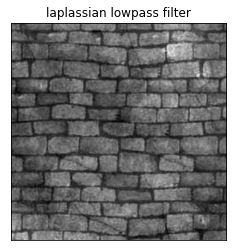

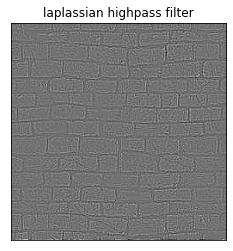

In [39]:
def laplassian_filter(img):
    x, y = img.shape[0], img.shape[1]
    filt = np.zeros(img.shape)
    for k in range(img.shape[2]):
        for i in range(x):
            for j in range(y):
                filt[i,j,k] = -4*np.pi**2*((i-x//2)**2+(j-y//2)**2)
    return 1-filt/np.min(filt)

new_img = scale(np.fft.ifftn(np.fft.ifftshift(laplassian_filter(img)*f), axes=(0,1)).real)
show_image(new_img, title='laplassian lowpass filter')
new_img = scale(np.fft.ifftn(np.fft.ifftshift((1-laplassian_filter(img))*f), axes=(0,1)).real)
show_image(new_img, title='laplassian highpass filter')

# Butterworth Filter

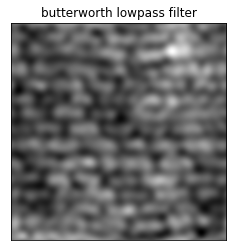

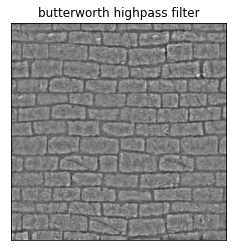

In [56]:
def butterworth_filter(img, w0, N):
    x, y = img.shape[0], img.shape[1]
    filt = np.zeros(img.shape)
    for k in range(img.shape[2]):
        for i in range(x):
            for j in range(y):
                filt[i,j,k] = 1/(1+((i-x//2)**(2*N)+(j-y//2)**(2*N))/w0**(2*N))
    return filt/np.max(filt)

w0 = 15 # center frequency of filter
N = 4 # order of filter

new_img = scale(np.fft.ifftn(np.fft.ifftshift(butterworth_filter(img, w0, N)*f), axes=(0,1)).real)
show_image(new_img, title='butterworth lowpass filter')
new_img = scale(np.fft.ifftn(np.fft.ifftshift((1-butterworth_filter(img, w0, N))*f), axes=(0,1)).real)
show_image(new_img, title='butterworth highpass filter')